In [1]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers
from elasticsearch.helpers import scan
import requests, json
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
from collections import Counter

Matplotlib is building the font cache; this may take a moment.


## Nacitanie json

In [2]:
data = []
with open('person.json', encoding='utf-8') as f:
    for line in f:
        if "-00" not in line:
            data.append(json.loads(line[:-2]))

In [12]:
json_dataframe = pd.DataFrame(data)

In [13]:
json_dataframe['name'] = json_dataframe['name'].str.replace('@en', '')
json_dataframe.drop(json_dataframe.columns[[6]], axis=1, inplace=True)

## Indexovanie

In [ ]:
es = Elasticsearch([{'host': 'localhost', 'port': 9200}], timeout=30, max_retries=10, retry_on_timeout=True)

In [ ]:
helpers.bulk(es, data, index='person')

## Profesia

In [14]:
json_profession_dataframe = json_dataframe.explode('profession')

In [47]:
most_profession = json_profession_dataframe['profession'].value_counts()[:4].index.tolist()

sum_profession = []
sum_profession.append(json_dataframe.profession.str.count(most_profession[0]).sum())
sum_profession.append(json_dataframe.profession.str.count(most_profession[1]).sum())
sum_profession.append(json_dataframe.profession.str.count(most_profession[2]).sum())
sum_profession.append(json_dataframe.profession.str.count(most_profession[3]).sum())

sum_profession.sort(reverse=True)

In [48]:
print("1. najcastejsia profesia - ", most_profession[0], round(100 * sum_profession[0]/len(json_dataframe), 2),"%")
print("2. najcastejsia profesia - ", most_profession[1], round(100 * sum_profession[1]/len(json_dataframe), 2),"%")
print("3. najcastejsia profesia - ", most_profession[2], round(100 * sum_profession[2]/len(json_dataframe), 2),"%")
print("4. najcastejsia profesia - ", most_profession[3], round(100 * sum_profession[3]/len(json_dataframe), 2),"%")

1. najcastejsia profesia -  None 54.99 %
2. najcastejsia profesia -  Actor 7.45 %
3. najcastejsia profesia -  Writer 2.54 %
4. najcastejsia profesia -  Politician 1.15 %


## Pohlavie

In [49]:
most_gender_labels = json_dataframe['gender'].unique()
most_gender_number = json_dataframe['gender'].value_counts()

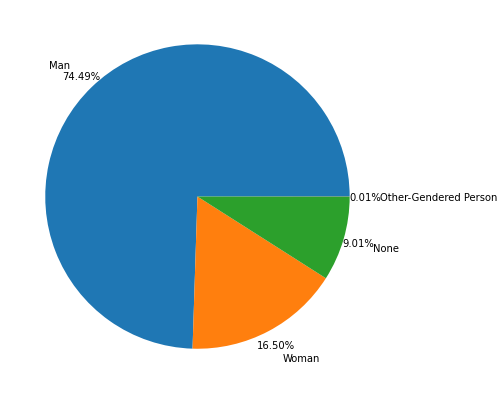

In [51]:
labels = most_gender_labels
number = [most_gender_number]
fig = plt.figure(figsize =(10, 7)) 
plt.pie(np.array(number).ravel(), labels = labels, autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.2) 
  
plt.show() 

## Aliasy

In [79]:
json_alias_dataframe = json_dataframe.explode('alias')

In [80]:
most_alias = json_alias_dataframe['name'].value_counts()[:4].index.tolist()

In [81]:
most_aliases = json_dataframe[json_dataframe['name'].str.contains(most_alias[0], na=False)]

In [82]:
most_aliases['alias'].iloc[0]

['Joan Almirall@it',
 'Rick Deconinck@it',
 'Jess@en',
 'Frarik Hollmann@en',
 'Dan L. Simon@it',
 'Tío Jess@en',
 'Robert Zinnermann@es-419',
 'Jeff Frank@it',
 'Dennis Farnon@es-419',
 'Jess Frank@it',
 'James P. Johnson@en',
 'Rosa M. Almirall@en',
 'Terry De Corsia@en',
 'Preston Quaid@es-419',
 'Betty Carter@es-419',
 'Lulu Laverne@it',
 'Manfred Gregor@en',
 'J.F. Manner@en',
 'J. Franco@it',
 'Frank Hollman@es-419',
 'Rosa Mª Almirall@it',
 'Dave Tough@it',
 'A.L. Marioux@en',
 'Clifford Brown Jr.@it',
 'Jesus Manera@en',
 'Lowel Richmond@es-419',
 'Preston Quaid@en',
 'Pablo Villa@it',
 'David Khune@es-419',
 'David Kühne@es-419',
 'Jack Griffin@it',
 'A.L. Malraux@en',
 'Rosa Mª Almirall@es-419',
 'Jeff Manner@en',
 'Clifford Brown Jr.@es-419',
 'Jess Franck@it',
 'B.F. Johnson@es-419',
 'Adolf M. Frank@it',
 'Rosa Almirall@es-419',
 'D. Khunne@it',
 'Frank Hollmann@es-419',
 'B.F. Johnson@it',
 'David Khunne II@es-419',
 'Raymond Dubois@en',
 'Clifford Brown@en',
 'P. Querut@

## Datumy

In [5]:
g_m = es.search(index='person', scroll="5m", body={ "query": {"match": {"gender":"Man"}}})
g_w = es.search(index='person', scroll="5m", body={ "query": {"match": {"gender":"Woman"}}})
g_o = es.search(index='person', scroll="5m", body={ "query": {"match": {"gender":"Other-Gendered Person"}}})
g_n = es.search(index='person', scroll="5m", body={ "query": {"match": {"gender":"None"}}})

In [6]:
g_m_c = g_m['hits']['total']['value']
g_w_c = g_w['hits']['total']['value']
g_o_c = g_o['hits']['total']['value']
g_n_c = g_n['hits']['total']['value']

In [7]:
g_m_c

938406